In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
caminho = 'ne_110m_admin_0_countries'
geo_dados = gpd.read_file(caminho)

In [27]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [28]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             193 non-null    int64  
 1   Country Name                            193 non-null    object 
 2   E-Government Rank                       193 non-null    int64  
 3   E-Government Index                      193 non-null    float64
 4   E-Participation Index                   193 non-null    float64
 5   Online Service Index                    193 non-null    float64
 6   Human Capital Index                     193 non-null    float64
 7   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ KB


In [29]:
egdi = egdi.iloc[:, [1, 5]]

In [30]:
print(egdi['Country Name'].value_counts().sum())
print(geo_dados['SOVEREIGNT'].value_counts().sum())

193
177


In [31]:
set(geo_dados['SOVEREIGNT']).difference(set(egdi['Country Name']))

{'Antarctica',
 'Brunei',
 'Czechia',
 'East Timor',
 'Georgia',
 'Iran',
 'Ivory Coast',
 'Kosovo',
 'Laos',
 'Moldova',
 'North Korea',
 'Northern Cyprus',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Somaliland',
 'South Korea',
 'Syria',
 'Taiwan',
 'The Bahamas',
 'Turkey',
 'United Kingdom',
 'Vietnam',
 'Western Sahara',
 'eSwatini'}

In [32]:
egdi['Country Name'] = egdi['Country Name'].replace({
    'Czech Republic': 'Czechia' ,
    'Brunei Darussalam': 'Brunei',
    'Timor-Leste': 'East Timor',
    'Georgia (Country)': 'Georgia',
    'Iran (Islamic Republic of)': 'Iran',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Eswatini': 'eSwatini',
    'Viet Nam': 'Vietnam',
    'Congo': 'Republic of the Congo',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Serbia': 'Republic of Serbia',
    'Republic of Moldova': 'Moldova',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Syrian Arab Republic': 'Syria',
    'Bahamas': 'The Bahamas',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Türkiye': 'Turkey'
})

In [33]:
set(geo_dados['SOVEREIGNT']).difference(set(egdi['Country Name']))

{'Antarctica',
 'Kosovo',
 'Northern Cyprus',
 'Somaliland',
 'Taiwan',
 'Western Sahara'}

In [34]:
len(set(egdi['Country Name']).difference(set(geo_dados['SOVEREIGNT'])))

28

In [35]:
geo_dados = geo_dados.merge(egdi, left_on='SOVEREIGNT', right_on='Country Name')

C:\Users\lazar\AppData\Local\Temp\ipykernel_11460\944301482.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


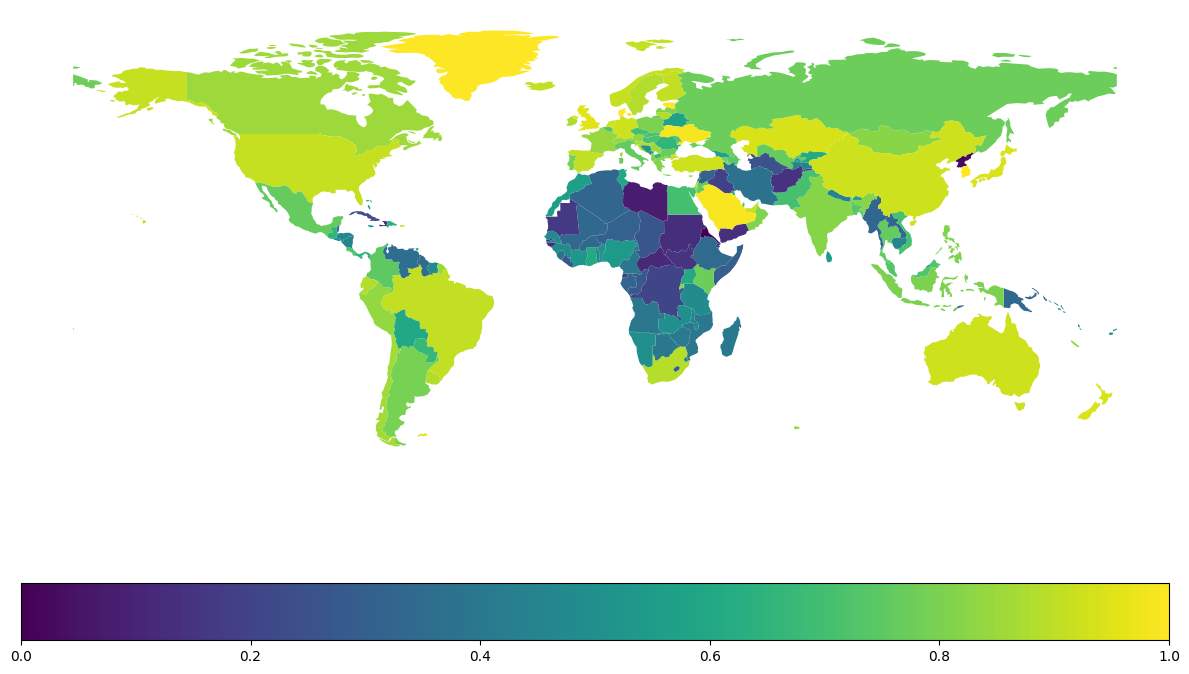

In [36]:
ax = geo_dados.plot(
    column='Online Service Index',
    figsize=(12, 8),
    legend=True,
    legend_kwds={
        'orientation': 'horizontal'
    },
    vmin=0,
    vmax=1
)

ax.axis('off')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/mapa_coropletico_paises_osi.png', dpi=300, bbox_inches='tight')
fig.show()